# <font color='blue'>Melanoma Detection Assignment - Convolutional Network</font>

# <font color='blue'>Index</font>
- <font color='blue'>1. Initial Steps</font>
	- <font color='blue'>1.1 Imports</font>
	- <font color='blue'>1.2 Google Drive Connect</font>
	- <font color='blue'>1.3 Setting paths</font>
	- <font color='blue'>1.4 Listing File Counts</font>
	- <font color='blue'>1.5 Params Declaration</font>
	- <font color='blue'>1.6 Creating Dataset</font>
	- <font color='blue'>1.7 Listing Class Names</font>
	- <font color='blue'>1.8 Visualizing Data</font>
	- <font color='blue'>1.9 Setting cache for Dataset</font>
- <font color='blue'>2. Models</font>
	- <font color='blue'>2.1 Model 1 - Basic Model with Convolutional Layers Only</font>
		- <font color='blue'>2.1.1 Model Design, Compile & Summary</font>
		- <font color='blue'>2.1.2 Model Training</font>
		- <font color='blue'>2.1.3 Visualizing Training Results</font>
	- <font color='blue'>2.2 Augmenting Training Dataset</font>
	- <font color='blue'>2.3 Model 2 - Convolutional Layers + Augmentation</font>
		- <font color='blue'>2.3.1 Model Design, Compile & Summary</font>
		- <font color='blue'>2.3.2 Model Training</font>
		- <font color='blue'>2.3.3 Visualizing Training Results</font>
	- <font color='blue'>2.4 Model 3 - Convolutional Layers + Augmentation + Dropout</font>
		- <font color='blue'>2.4.1 Model Design, Compile & Summary</font>
		- <font color='blue'>2.4.2 Model Training</font>
		- <font color='blue'>2.4.3 Visualizing Training Results</font>
	- <font color='blue'>2.5 Model 4 - Convolutional Layers + Augmentation + Additional Dropouts</font>
		- <font color='blue'>2.5.1 Model Design, Compile & Summary</font>
		- <font color='blue'>2.5.2 Model Training</font>
		- <font color='blue'>2.5.3 Visualizing Training Results</font>
	- <font color='blue'>2.6 Model 5 - Convolutional Layers + Augmentation + Additional Dropouts + Batch Normalization</font>
		- <font color='blue'>2.6.1 Model Design, Compile & Summary</font>
		- <font color='blue'>2.6.2 Model Training</font>
		- <font color='blue'>2.6.3 Visualizing Training Results</font>
	- <font color='blue'>2.7 Class Imbalance Augmentation</font>
		- <font color='blue'>2.7.1 Class Distribution</font>
		- <font color='blue'>2.7.2 Rectification with Augmentor Samples Generation</font>
	- <font color='blue'>2.8 Model 6 - Convolutional Layers + Additional Dropouts + Batch Normalization + Augmented Dataset</font>
		- <font color='blue'>2.8.1 Reinitializing Dataset with New Augmented Data</font>
		- <font color='blue'>2.8.2 Model Design, Compile & Summary</font>
		- <font color='blue'>2.8.3 Model Training</font>
		- <font color='blue'>2.8.4 Visualizing Training Results</font>
- <font color='blue'>3. Model Prediction</font>
	- <font color='blue'>3.1 Initializing Test Dataset</font>
	- <font color='blue'>3.2 Evaluate, Record Accuracy & Loss</font>
	- <font color='blue'>3.3 Predicting Probability on 1st Image of each Class</font>

## <font color='blue'>1. Initial Steps</font>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### <font color='blue'>1.1 Imports</font>

In [95]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob

import warnings
warnings.filterwarnings('ignore')

In [119]:
!python --version
print('Numpy:', np.version.version)
print('Pands:', pd.__version__)
print('Tensorflow:', tf.__version__)
!jupyter --version

Python 3.11.4
Numpy: 1.24.3
Pands: 2.0.3
Tensorflow: 2.15.0


Selected Jupyter core packages...
IPython          : 8.12.2
ipykernel        : 6.25.0
ipywidgets       : 8.0.4
jupyter_client   : 8.6.0
jupyter_core     : 5.3.0
jupyter_server   : 1.23.4
jupyterlab       : 3.0.7
nbclient         : 0.5.13
nbconvert        : 6.5.4
nbformat         : 5.7.0
notebook         : 6.4.5
qtconsole        : 5.4.2
traitlets        : 5.7.1


### <font color='blue'>1.2 Google Drive Connect</font>

In [56]:
from google.colab import drive
drive.mount('/content/gdrive')

### <font color='blue'>1.3 Setting paths</font>

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [57]:
# Defining the path for train and test images
# Google Drive
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")
# Local, if compute units expired
# data_dir_train = pathlib.Path("G:\\My Drive\\Personal\\upGrad\\MS\\Melanoma Detection Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train")
# data_dir_test = pathlib.Path("G:\\My Drive\\Personal\\upGrad\\MS\\Melanoma Detection Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test")

### <font color='blue'>1.4 Listing File Counts</font>

In [58]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### <font color='blue'>1.5 Params Declaration</font>

In [59]:
batch_size = 32
img_height = 180
img_width = 180
seed = 123

### <font color='blue'>1.6 Creating Dataset</font>

In [60]:
# Using 80% of the images for training, and 20% for validation.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,  # 80% for training, 20% for validation
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [61]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


### <font color='blue'>1.7 Listing Class Names</font>

In [62]:
# List out all the classes of skin cancer and store them in a list.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### <font color='blue'>1.8 Visualizing Data</font>

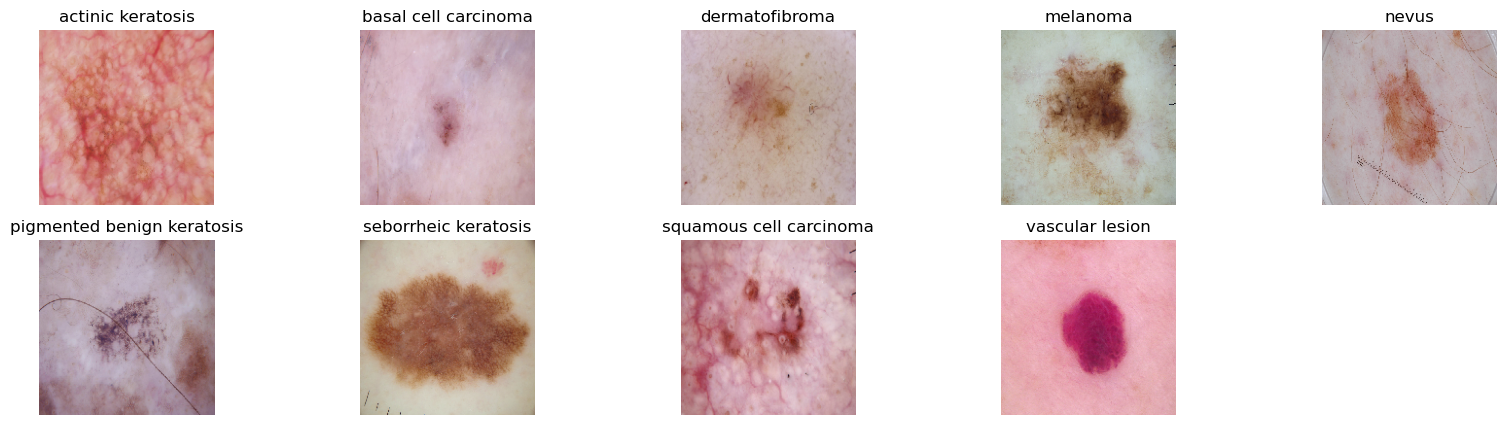

In [63]:
plt.figure(figsize=(20, 5))

# iterate over each class and display one image
for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir_train, class_name)
    image_path = os.path.join(class_path, os.listdir(class_path)[0])  # Get the first image in each class
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))

    plt.subplot(2, 5, i + 1)  # Adjust the subplot layout based on the number of classes
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.show()

### <font color='blue'>1.9 Setting cache for Dataset</font>

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [64]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## <font color='blue'>2. Models</font>

### <font color='blue'>2.1 Model 1 - Basic Model with Convolutional Layers Only</font>

#### <font color='blue'>2.1.1 Model Design, Compile & Summary</font>

In [65]:
model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 45, 45, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 128)      

#### <font color='blue'>2.1.2 Model Training</font>

In [66]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 94s 1s/step - loss: 2.1157 - accuracy: 0.3025 - val_loss: 1.6523 - val_accuracy: 0.3579
Epoch 2/20
56/56 [==============================] - 61s 1s/step - loss: 1.6076 - accuracy: 0.4202 - val_loss: 1.5554 - val_accuracy: 0.4430
Epoch 3/20
56/56 [==============================] - 58s 1s/step - loss: 1.3768 - accuracy: 0.5246 - val_loss: 1.3708 - val_accuracy: 0.5414
Epoch 4/20
56/56 [==============================] - 61s 1s/step - loss: 1.2914 - accuracy: 0.5575 - val_loss: 1.3690 - val_accuracy: 0.5101
Epoch 5/20
56/56 [==============================] - 58s 1s/step - loss: 1.1590 - accuracy: 0.5871 - val_loss: 1.3268 - val_accuracy: 0.5436
Epoch 6/20
56/56 [==============================] - 60s 1s/step - loss: 1.1221 - accuracy: 0.6066 - val_loss: 1.3985 - val_accuracy: 0.4899
Epoch 7/20
56/56 [==============================] - 56s 1s/step - loss: 1.0448 - accuracy: 0.6317 - val_loss: 1.3712 - val_accuracy: 0.5369
Epoch 8/20
56/56 [=============

#### <font color='blue'>2.1.3 Visualizing Training Results</font>

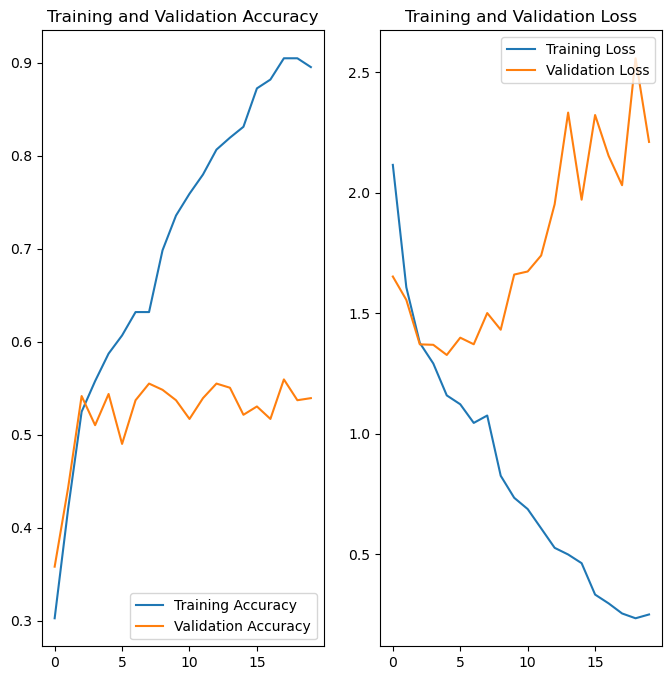

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is High
2. Validation Accuracy: is OK
3. Training Loss: is decreasing, good fit
4. Validation Loss: is increasing, not a good fit

### <font color='blue'>2.2 Augmenting Training Dataset</font>

In [68]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
augmented_train_ds = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

### <font color='blue'>2.3 Model 2 - Convolutional Layers + Augmentation</font>

#### <font color='blue'>2.3.1 Model Design, Compile & Summary</font>

In [69]:
model = models.Sequential([
    augmented_train_ds,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 45, 45, 64)        0         
 ng2D)                                                

#### <font color='blue'>2.3.2 Model Training</font>

In [70]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 60s 1s/step - loss: 2.3527 - accuracy: 0.2377 - val_loss: 1.7097 - val_accuracy: 0.4228
Epoch 2/20
56/56 [==============================] - 59s 1s/step - loss: 1.6163 - accuracy: 0.4012 - val_loss: 1.4482 - val_accuracy: 0.5280
Epoch 3/20
56/56 [==============================] - 63s 1s/step - loss: 1.4235 - accuracy: 0.4944 - val_loss: 1.4420 - val_accuracy: 0.5056
Epoch 4/20
56/56 [==============================] - 61s 1s/step - loss: 1.4031 - accuracy: 0.5073 - val_loss: 1.3876 - val_accuracy: 0.5123
Epoch 5/20
56/56 [==============================] - 62s 1s/step - loss: 1.3576 - accuracy: 0.5095 - val_loss: 1.3567 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 58s 1s/step - loss: 1.3214 - accuracy: 0.5307 - val_loss: 1.4102 - val_accuracy: 0.5011
Epoch 7/20
56/56 [==============================] - 61s 1s/step - loss: 1.2926 - accuracy: 0.5480 - val_loss: 1.4056 - val_accuracy: 0.5011
Epoch 8/20
56/56 [==

#### <font color='blue'>2.3.3 Visualizing Training Results</font>

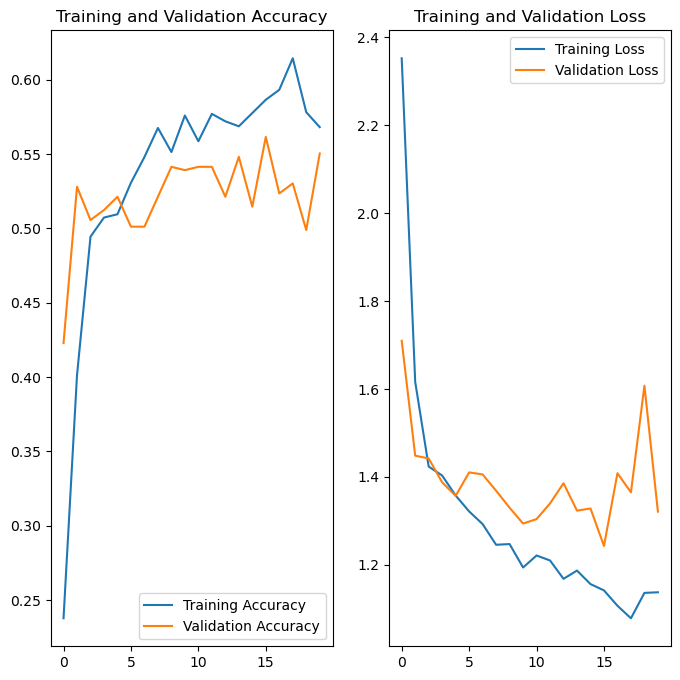

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is OK
2. Validation Accuracy: is Low
3. Training Loss: is decreasing, good fit
4. Validation Loss: is increasing, not a good fit

### <font color='blue'>2.4 Model 3 - Convolutional Layers + Augmentation + Dropout</font>

#### <font color='blue'>2.4.1 Model Design, Compile & Summary</font>

In [72]:
model = models.Sequential([
    augmented_train_ds,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Dropout(0.2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 45, 45, 64)        0         
 ng2D)                                                

#### <font color='blue'>2.4.2 Model Training</font>

In [73]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 60s 1s/step - loss: 2.3641 - accuracy: 0.2065 - val_loss: 1.9217 - val_accuracy: 0.2886
Epoch 2/20
56/56 [==============================] - 64s 1s/step - loss: 1.6918 - accuracy: 0.4068 - val_loss: 1.5911 - val_accuracy: 0.4407
Epoch 3/20
56/56 [==============================] - 58s 1s/step - loss: 1.4913 - accuracy: 0.4782 - val_loss: 1.4848 - val_accuracy: 0.5011
Epoch 4/20
56/56 [==============================] - 61s 1s/step - loss: 1.4260 - accuracy: 0.5011 - val_loss: 1.5729 - val_accuracy: 0.4586
Epoch 5/20
56/56 [==============================] - 59s 1s/step - loss: 1.4387 - accuracy: 0.4961 - val_loss: 1.5099 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 65s 1s/step - loss: 1.3599 - accuracy: 0.5251 - val_loss: 1.4528 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 59s 1s/step - loss: 1.3077 - accuracy: 0.5234 - val_loss: 1.3933 - val_accuracy: 0.5213
Epoch 8/20
56/56 [=============

#### <font color='blue'>2.4.3 Visualizing Training Results</font>

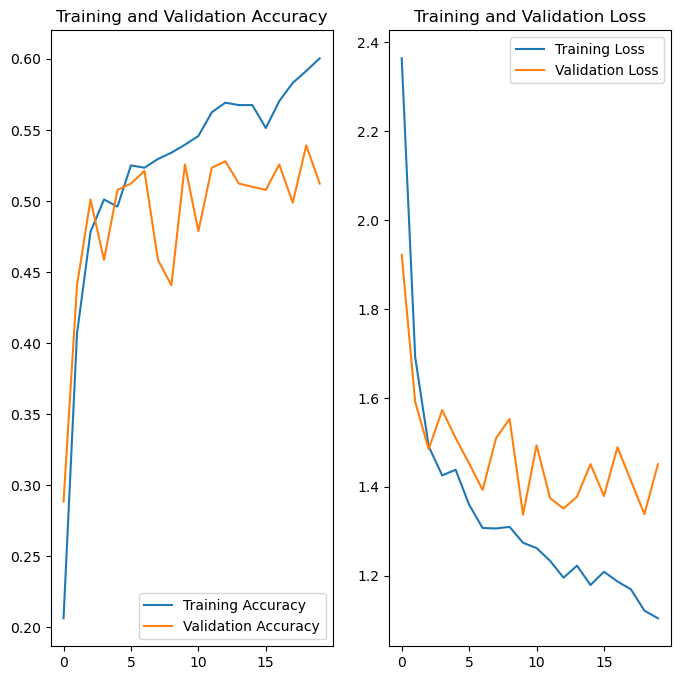

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is OK
2. Validation Accuracy: is Low
3. Training Loss: is decreasing, good fit
4. Validation Loss: is decreasing, good start

### <font color='blue'>2.5 Model 4 - Convolutional Layers + Augmentation + Additional Dropouts</font>

#### <font color='blue'>2.5.1 Model Design, Compile & Summary</font>

In [75]:
model = models.Sequential([
    augmented_train_ds,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Dropout(0.2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 64)        18496     
                                                      

#### <font color='blue'>2.5.2 Model Training</font>

In [76]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 75s 1s/step - loss: 2.6974 - accuracy: 0.1964 - val_loss: 2.0617 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 69s 1s/step - loss: 2.0246 - accuracy: 0.2215 - val_loss: 2.0488 - val_accuracy: 0.2752
Epoch 3/20
56/56 [==============================] - 68s 1s/step - loss: 1.8784 - accuracy: 0.3175 - val_loss: 1.8391 - val_accuracy: 0.3423
Epoch 4/20
56/56 [==============================] - 73s 1s/step - loss: 1.6900 - accuracy: 0.4035 - val_loss: 1.5959 - val_accuracy: 0.4474
Epoch 5/20
56/56 [==============================] - 69s 1s/step - loss: 1.5573 - accuracy: 0.4531 - val_loss: 1.5227 - val_accuracy: 0.4899
Epoch 6/20
56/56 [==============================] - 69s 1s/step - loss: 1.4997 - accuracy: 0.4665 - val_loss: 1.5940 - val_accuracy: 0.4653
Epoch 7/20
56/56 [==============================] - 68s 1s/step - loss: 1.3869 - accuracy: 0.5179 - val_loss: 1.4840 - val_accuracy: 0.5101
Epoch 8/20
56/56 [=============

#### <font color='blue'>2.5.3 Visualizing Training Results</font>

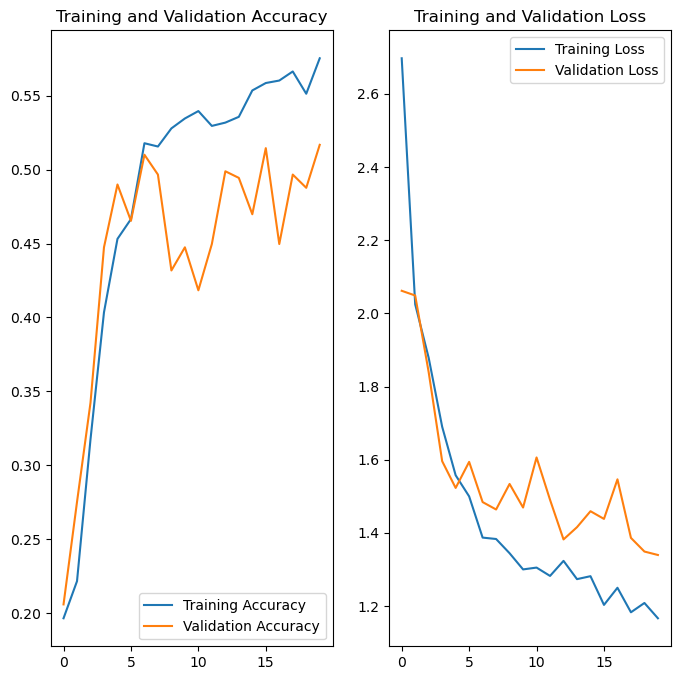

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is OK
2. Validation Accuracy: is Low
3. Training Loss: is decreasing, good fit
4. Validation Loss: is decreasing, good progress

### <font color='blue'>2.6 Model 5 - Convolutional Layers + Augmentation + Additional Dropouts + Batch Normalization</font>

#### <font color='blue'>2.6.1 Model Design, Compile & Summary</font>

In [78]:
model = models.Sequential([
    augmented_train_ds,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization (Batch  (None, 90, 90, 32)        128       
 Normalization)                                                  
                                                                 
 dropout_4 (Dropout)         (None, 90, 90, 32)       

#### <font color='blue'>2.6.2 Model Training</font>

In [79]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 82s 1s/step - loss: 8.5226 - accuracy: 0.2606 - val_loss: 9.0490 - val_accuracy: 0.1678
Epoch 2/20
56/56 [==============================] - 71s 1s/step - loss: 1.8079 - accuracy: 0.3438 - val_loss: 10.7953 - val_accuracy: 0.1477
Epoch 3/20
56/56 [==============================] - 69s 1s/step - loss: 1.6320 - accuracy: 0.4252 - val_loss: 18.7763 - val_accuracy: 0.1477
Epoch 4/20
56/56 [==============================] - 75s 1s/step - loss: 1.5602 - accuracy: 0.4459 - val_loss: 22.9842 - val_accuracy: 0.1499
Epoch 5/20
56/56 [==============================] - 71s 1s/step - loss: 1.5087 - accuracy: 0.4621 - val_loss: 21.4812 - val_accuracy: 0.1566
Epoch 6/20
56/56 [==============================] - 71s 1s/step - loss: 1.4100 - accuracy: 0.4939 - val_loss: 18.1717 - val_accuracy: 0.1521
Epoch 7/20
56/56 [==============================] - 74s 1s/step - loss: 1.3751 - accuracy: 0.5095 - val_loss: 12.5833 - val_accuracy: 0.1633
Epoch 8/20
56/56 [=======

#### <font color='blue'>2.6.3 Visualizing Training Results</font>

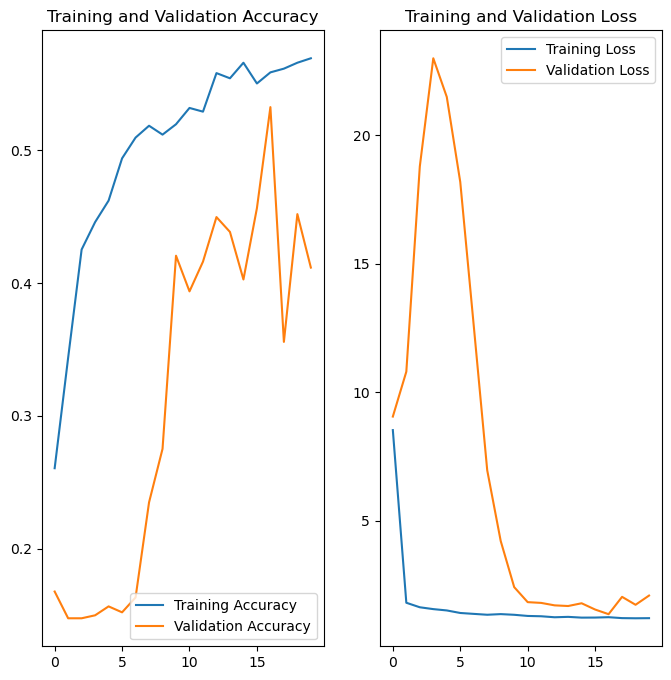

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is Low
2. Validation Accuracy: is Low
3. Training Loss: is decreasing, good fit
4. Validation Loss: is decreasing

### <font color='blue'>2.7 Class Imbalance Augmentation</font>

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

#### <font color='blue'>2.7.1 Class Distribution</font>

In [124]:
# train data in each folders
dir_train = os.listdir(data_dir_train)
dir_train.sort()
dir_test = os.listdir(data_dir_test)
dir_test.sort()

data_detail_pd = pd.DataFrame(columns=["Class","Images (Train)","Percentage (Train)","Images (Test)","Percentage (Test)"])

for dir_name in dir_train:
   total_image_in_folder = len(list(data_dir_train.glob(dir_name+"/*.jpg")))
   df = {"Class":dir_name,"Images (Train)":total_image_in_folder,"Percentage (Train)":round((total_image_in_folder/image_count_train)*100,2)}
   data_detail_pd = pd.concat([data_detail_pd, pd.DataFrame(df, index=[0])],ignore_index=True)

data_detail_pd = data_detail_pd.set_index("Class")

# test data in each folders
for dir_name in dir_test:
   total_image_in_folder = len(list(data_dir_test.glob(dir_name+"/*.jpg")))
   data_detail_pd.loc[dir_name,"Images (Test)"]  = total_image_in_folder
   data_detail_pd.loc[dir_name,"Percentage (Test)"]  = round((total_image_in_folder/image_count_test)*100,2)

display(data_detail_pd.sort_values(by="Percentage (Train)",ascending=False))

,Images (Train),Percentage (Train),Images (Test),Percentage (Test)
Class,,,,
pigmented benign keratosis,462,20.63,16,13.56
melanoma,438,19.56,16,13.56
basal cell carcinoma,376,16.79,16,13.56
nevus,357,15.94,16,13.56
squamous cell carcinoma,181,8.08,16,13.56
vascular lesion,139,6.21,3,2.54
actinic keratosis,114,5.09,16,13.56
dermatofibroma,95,4.24,16,13.56
seborrheic keratosis,77,3.44,3,2.54


### Findings:
1. Highest Training Images: pigmented benign keratosis, 462 = 20.63%
2. Lowest Training Images: seborrheic keratosis, 77 = 3.44%
3. Highest Testing Images: All have same except vascular lesion, seborrheic keratosis, 16 = 0.71%
4. Lowest Testing Images: vascular lesion, seborrheic keratosis, 3 = 0.13%

#### <font color='blue'>2.7.2 Rectification with Augmentor Samples Generation</font>

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


### Generating samples with Augmentor

In [ ]:
path_to_training_dataset = str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i, save_format='.jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C65E0EF0790>: 100%|██████████| 500/500 [00:22<00:00, 22.40 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C65E0D43790>: 100%|██████████| 500/500 [00:23<00:00, 21.46 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C65E02CA9B0>: 100%|██████████| 500/500 [00:18<00:00, 26.83 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7C65E409B940>: 100%|██████████| 500/500 [01:19<00:00,  6.26 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7C65E0D92C50>: 100%|██████████| 500/500 [01:07<00:00,  7.38 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C65E0F5DAE0>: 100%|██████████| 500/500 [00:19<00:00, 26.02 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C65E0FA9480>: 100%|██████████| 500/500 [00:35<00:00, 14.00 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C65E0D901C0>: 100%|██████████| 500/500 [00:19<00:00, 26.31 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C66402D3460>: 100%|██████████| 500/500 [00:17<00:00, 28.12 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### <font color='blue'>2.8 Model 6 - Convolutional Layers + Additional Dropouts + Batch Normalization + Augmented Dataset</font>

#### <font color='blue'>2.8.1 Reinitializing Dataset with New Augmented Data</font>

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,  # 80% for training, 20% for validation
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
# AutoTune & cache for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### <font color='blue'>2.8.2 Model Design, Compile & Summary</font>

In [ ]:
model = models.Sequential([
    augmented_train_ds,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_3 (Bat  (None, 90, 90, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 90, 90, 32)      

#### <font color='blue'>2.8.3 Model Training</font>

In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 65s 133ms/step - loss: 3.3561 - accuracy: 0.2812 - val_loss: 14.8667 - val_accuracy: 0.0898
Epoch 2/50
169/169 [==============================] - 13s 74ms/step - loss: 1.7356 - accuracy: 0.3362 - val_loss: 10.5711 - val_accuracy: 0.1143
Epoch 3/50
169/169 [==============================] - 13s 74ms/step - loss: 1.5501 - accuracy: 0.4021 - val_loss: 2.4060 - val_accuracy: 0.2777
Epoch 4/50
169/169 [==============================] - 13s 75ms/step - loss: 1.4415 - accuracy: 0.4509 - val_loss: 1.8402 - val_accuracy: 0.3489
Epoch 5/50
169/169 [==============================] - 12s 73ms/step - loss: 1.4149 - accuracy: 0.4566 - val_loss: 1.4794 - val_accuracy: 0.4098
Epoch 6/50
169/169 [==============================] - 12s 73ms/step - loss: 1.3595 - accuracy: 0.4688 - val_loss: 1.6516 - val_accuracy: 0.3682
Epoch 7/50
169/169 [==============================] - 12s 73ms/step - loss: 1.3333 - accuracy: 0.4790 - val_loss: 2.1565 - val_accura

#### <font color='blue'>2.8.4 Visualizing Training Results</font>

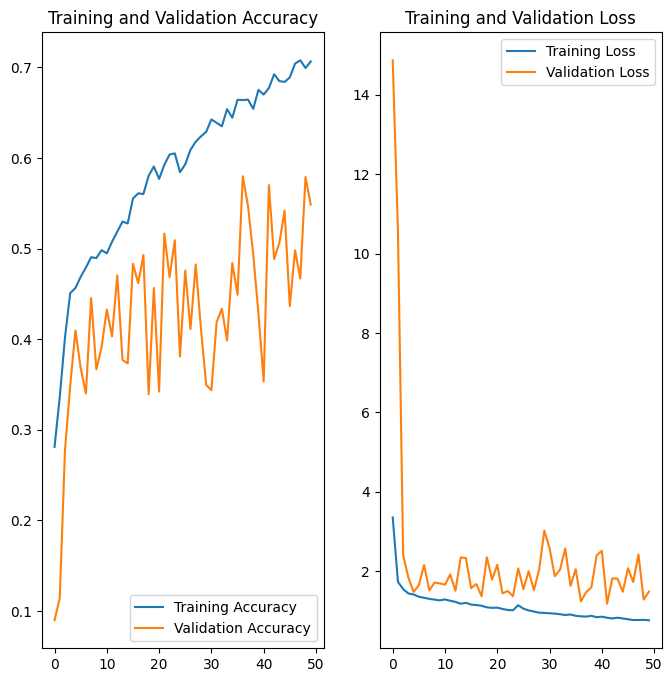

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is Good
2. Validation Accuracy: is OK
3. Training Loss: is decreasing, good fit
4. Validation Loss: is decreasing

## <font color='blue'>3. Model Prediction</font>

### <font color='blue'>3.1 Initializing Test Dataset</font>

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed = seed,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.


### <font color='blue'>3.2 Evaluate, Record Accuracy & Loss</font>

In [ ]:
loss , accuracy = model.evaluate(test_ds)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

4/4 [==============================] - 4s 105ms/step - loss: 6.7757 - accuracy: 0.3814
Accuracy:  0.3813559412956238
Loss:  6.7756853103637695


### <font color='blue'>3.3 Predicting Probability on 1st Image of each Class</font>

In [87]:
for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir_test, class_name)
    file_name = os.listdir(class_path)[0]
    image_path = os.path.join(class_path, file_name)  # Get the first image in each class

    img = tf.keras.utils.load_img(
      image_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print('Test/{}/{}=> Score:{}'.format(class_name,file_name,score))
    #print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(test_ds.class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 41ms/step
Test/actinic keratosis/ISIC_0025427.jpg=> Score:[0.10568105 0.12728041 0.10202937 0.09926075 0.1018718  0.15749958
 0.09825153 0.10983184 0.09829367]
1/1 [==============================] - 0s 40ms/step
Test/basal cell carcinoma/ISIC_0024436.jpg=> Score:[0.10210526 0.12804513 0.10387304 0.10153425 0.10433613 0.15033033
 0.09858107 0.10493755 0.1062573 ]
1/1 [==============================] - 0s 53ms/step
Test/dermatofibroma/ISIC_0011865.jpg=> Score:[0.09495287 0.09498224 0.09495494 0.22841966 0.10184565 0.09519994
 0.09973446 0.09495746 0.09495275]
1/1 [==============================] - 0s 36ms/step
Test/melanoma/ISIC_0000049.jpg=> Score:[0.09534441 0.09534502 0.0953446  0.22103137 0.11002426 0.09555641
 0.09666497 0.0953445  0.09534441]
1/1 [==============================] - 0s 37ms/step
Test/nevus/ISIC_0000014.jpg=> Score:[0.09726658 0.09726693 0.09726778 0.16434987 0.15180606 0.09961656
 0.09789289 0.09726672 0.09726657]
1/1 [======